In [1]:
import warnings 
warnings.filterwarnings('ignore')


import os 
os.getcwd()

'/Users/chominjeong/Coding/Data_analytics/Example/Chapter03'

## 문제상황 및 데이터 살펴보기

> **시나리오** ⚡ (제품 설계자, 오퍼레이터, 필드 데이터 분석가)

A사는 내년도 전력사용계획을 예측해 차년도 전력 예산안을 작성하려고 한다. 전력 발전량은 기상 날씨에 따라 변동이 심하기 때문에 전력 예산 수립에 어려움을 겪고 있다. 2017년 1년치에 대한 데이터를 활용하여 전력발전량 예측, 전력사용계획을 세우기

> **데이터살펴보기**
- 2017.01.01 ~ 2017.12.30 까지의 10분 단위로 기상 데이터 및 전력 발산량과 각 위치 (Zone 1 ~ 3)의 발전량이 기록되어 있음.
- 데이터

|Date|Temperature|Humidity|Wind Speed|general diffuse flows|diffuse flows|Zone 1 Power Consumption|Zone 2 Power Consumption|Zone 3 Power Consumption|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|날짜|온도|습도|풍속|전력 발산량(일반)|전력 발산량|Zone1 발전량|Zone2 발전량|Zone3 발전량|


In [2]:
import pandas as pd
df= pd.read_csv('chapter03_powercomp.csv')
df.head(10)

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
5,1/1/2017 0:50,5.853,76.9,0.081,0.059,0.108,26624.81013,17416.41337,18130.12048
6,1/1/2017 1:00,5.641,77.7,0.080,0.048,0.096,25998.98734,16993.31307,17945.06024
7,1/1/2017 1:10,5.496,78.2,0.085,0.055,0.093,25446.07595,16661.39818,17459.27711
8,1/1/2017 1:20,5.678,78.1,0.081,0.066,0.141,24777.72152,16227.35562,17025.54217
9,1/1/2017 1:30,5.491,77.3,0.082,0.062,0.111,24279.49367,15939.20973,16794.21687


### 문제해결 프로스 정의 
> **문제 정의**

전력예산수립의 어려움

> **기대효과**

전력예산수립을 통한 예산 확보 및 정상 운영

> **해결방안**

전력예측 모델을 통한 전력 사용 예측 및 전력 계획 수립
시계열 데이터 탐색 및 Peak 시간대 탐색 -> 다양한 Plot 활용한 데이터 상관관계 분석 -> ML 알고리즘 활용한 전략 발전량 예측

> **성과측정**

전력예측 모델 활용해 전력예산 수립으로 인한 운영 비용 절감

> **현업적용**

▶ 일기예보 기상 데이터 실시간 수집 체계 구축 

▶ 발전량 센서 데이터 실시간 서버 전송 체계 구축

▶ 일정 주기 간격으로 기상 데이터 인입 및 모델을 통해 발전량 예측 데이터 생성

▶ 생성된 데이터에 따라 전력 계획안 수립

## 전력 발전량 Peak 시간대 탐색 

### Data 전처리

수집된 데이터의 기본 정보들을 확인

(1) Data shape 확인

(2) Data type 확인

(3) Null값 확인

(4) Outlier 확인

In [ ]:
print('df', df.shape)
# 52416 row, 9 col

df (52416, 9)


In [4]:
# Data type 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DateTime                   52416 non-null  object 
 1   Temperature                52416 non-null  float64
 2   Humidity                   52416 non-null  float64
 3   Wind Speed                 52416 non-null  float64
 4   general diffuse flows      52416 non-null  float64
 5   diffuse flows              52416 non-null  float64
 6   Zone 1 Power Consumption   52416 non-null  float64
 7   Zone 2  Power Consumption  52416 non-null  float64
 8   Zone 3  Power Consumption  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


In [ ]:
print(df.isnull().sum())
# null값 없음

DateTime                     0
Temperature                  0
Humidity                     0
Wind Speed                   0
general diffuse flows        0
diffuse flows                0
Zone 1 Power Consumption     0
Zone 2  Power Consumption    0
Zone 3  Power Consumption    0
dtype: int64


In [6]:
# outlier확인
df.describe()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360


In [ ]:
# datetime으로 형 변환
import datetime 

df['DateTime'] = pd.to_datetime(df['DateTime'])

In [8]:
print(df.head(5))

             DateTime  Temperature  Humidity  Wind Speed  \
0 2017-01-01 00:00:00        6.559      73.8       0.083   
1 2017-01-01 00:10:00        6.414      74.5       0.083   
2 2017-01-01 00:20:00        6.313      74.5       0.080   
3 2017-01-01 00:30:00        6.121      75.0       0.083   
4 2017-01-01 00:40:00        5.921      75.7       0.081   

   general diffuse flows  diffuse flows  Zone 1 Power Consumption  \
0                  0.051          0.119               34055.69620   
1                  0.070          0.085               29814.68354   
2                  0.062          0.100               29128.10127   
3                  0.091          0.096               28228.86076   
4                  0.048          0.085               27335.69620   

   Zone 2  Power Consumption  Zone 3  Power Consumption  
0                16128.87538                20240.96386  
1                19375.07599                20131.08434  
2                19006.68693                19668.

### 전력량 Data 탐색 

Data Trend 분석

In [9]:
# 2017년 1년치 data 확인
df['DateTime'].min(), df['DateTime'].max()

(Timestamp('2017-01-01 00:00:00'), Timestamp('2017-12-30 23:50:00'))

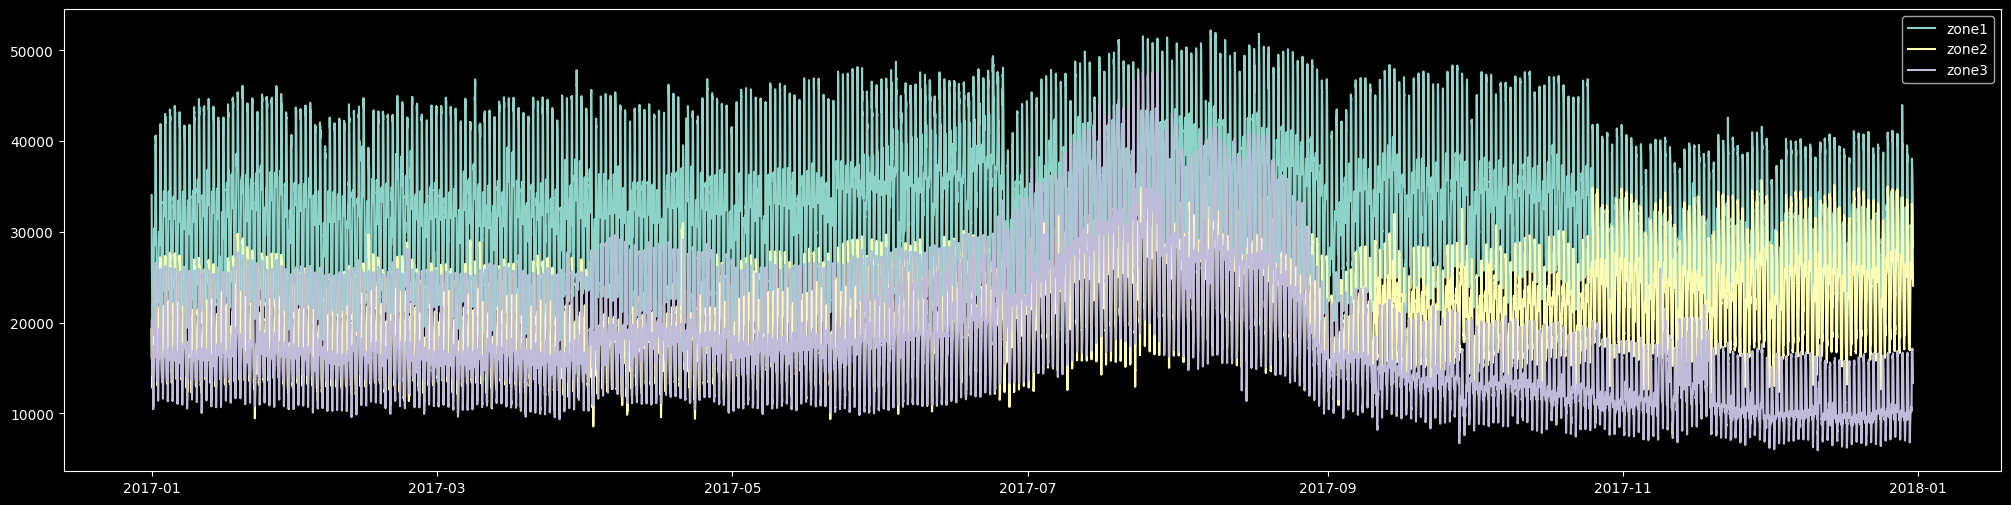

In [14]:
# Zone 1,2,3 전력 발전량

import seaborn as sns
import matplotlib.pyplot as plt 

%matplotlib inline 
plt.style.use(['dark_background'])

plt.plot(df['DateTime'], df['Zone 1 Power Consumption'], label = 'zone1')
plt.plot(df['DateTime'], df['Zone 2  Power Consumption'], label = 'zone2')
plt.plot(df['DateTime'], df['Zone 3  Power Consumption'], label = 'zone3')
plt.legend()
plt.gcf().set_size_inches(25,6)

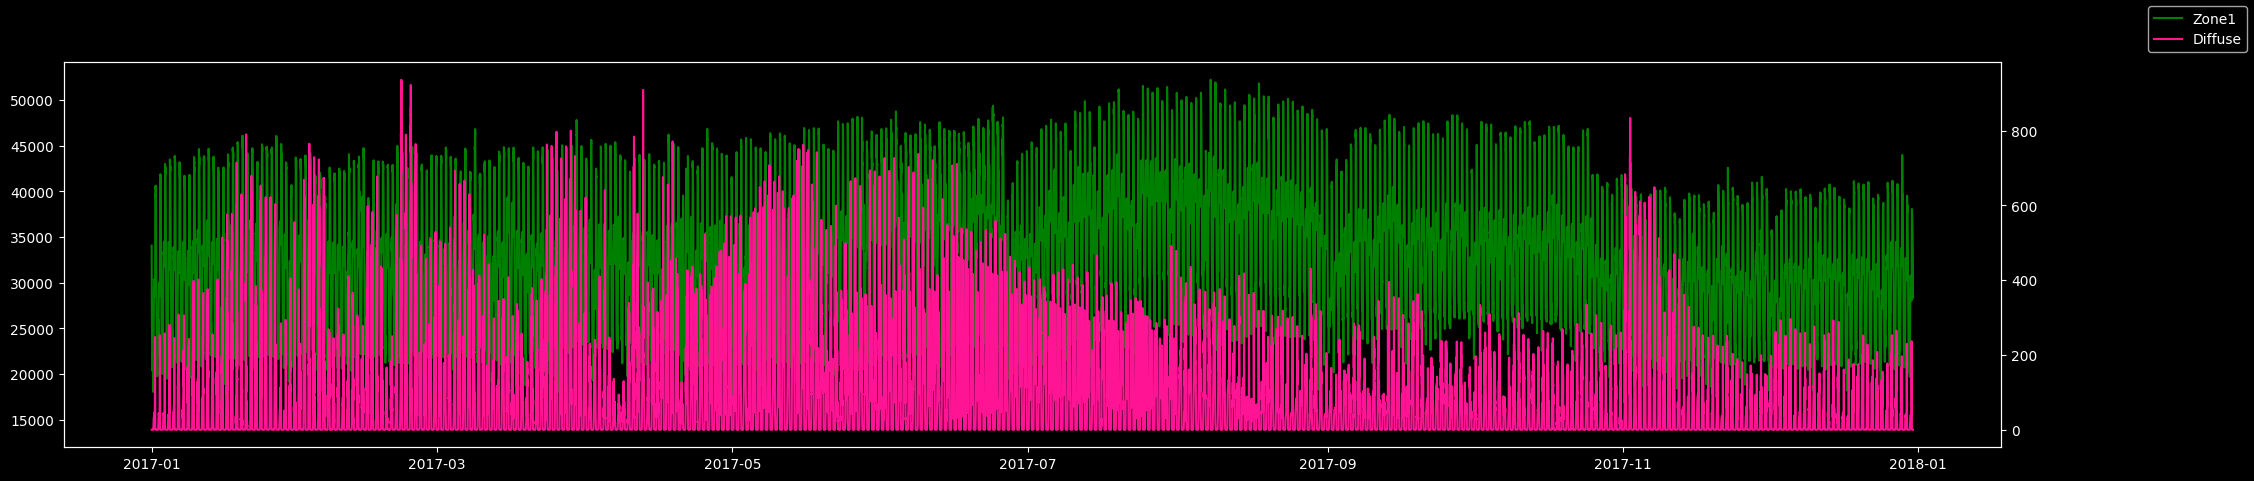

In [ ]:
# Zone1 발전량과 전력 발산량 비교 
fig, ax1 = plt.subplots()
ax1.plot(df['DateTime'], df['Zone 1 Power Consumption'], color='green', label='Zone1')

ax2 = ax1.twinx()
ax2.plot(df['DateTime'], df['diffuse flows'], color = 'deeppink', label = 'Diffuse')

fig.legend()
plt.gcf().set_size_inches(25,5)
plt.show()

# 전력발산량이 낮아질때 전력발전량이 높아짐 

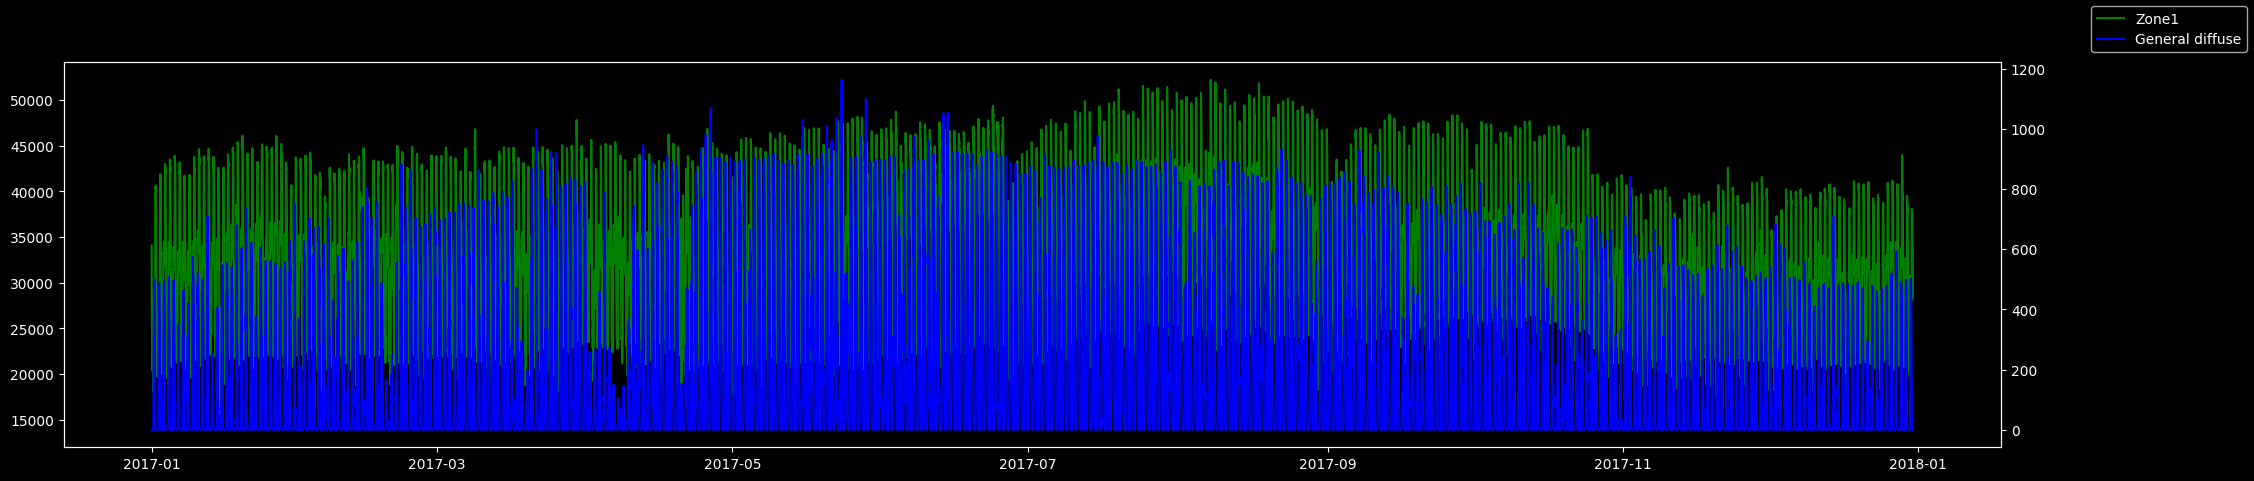

In [ ]:
# 발전량과 전력 발산량 일반 비교
fig, ax1 = plt.subplots()
ax1.plot(df['DateTime'], df['Zone 1 Power Consumption'], color='green', label='Zone1')

ax2 = ax1.twinx()
ax2.plot(df['DateTime'], df['general diffuse flows'], color='blue', label='General diffuse')

fig.legend()
plt.gcf().set_size_inches(25, 5)
plt.show()
# 전력 발산량 일반과는 큰 상관관계는 없어 보임


### Peak 시간대 탐색

전력발전량 Peak 월 탐색

전력발전량 Peak 시간대 탐색

In [17]:
# 시간 데이터 활용 - Month 
df['Month'] = df['DateTime'].dt.month
df.head(5)

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption,Month
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,1
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,1
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,1
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,1
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,1


In [19]:
# 칼럼명 변경
df.columns = ['DateTime', 'Temperature', 'Humidity', 'Wind Speed',
       'general diffuse flows', 'diffuse flows', 'zone1',
       'zone2', 'zone3', 'month']


In [21]:
df = df[['DateTime', 'month', 'Temperature', 'Humidity', 'Wind Speed',
       'general diffuse flows', 'diffuse flows', 'zone1',
       'zone2', 'zone3']]

In [22]:
df.head(5)

,DateTime,month,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,zone1,zone2,zone3
0,2017-01-01 00:00:00,1,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,2017-01-01 00:10:00,1,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,2017-01-01 00:20:00,1,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,2017-01-01 00:30:00,1,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,2017-01-01 00:40:00,1,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [24]:
df['zone1'].groupby(df['month']).mean().sort_values(ascending=False).head(5)

# 8월이 가장 평균 발전량이 많음

month
8     36435.189574
7     35831.553603
6     34605.540839
9     33396.681416
10    32827.660055
Name: zone1, dtype: float64

In [ ]:
df['zone2'].groupby(df['month']).mean().sort_values(ascending=False).head(5)
# 8월이 가장 평균 발전량이 많음

month
8     24656.216575
7     24147.886893
12    23681.852818
11    23240.464015
10    21468.993441
Name: zone2, dtype: float64

In [27]:
df['zone3'].groupby(df['month']).mean().sort_values(ascending=False).head(5)
# 7월이 가장 평균 발전량이 많음

month
7    28194.111216
8    24648.894732
6    20430.941538
4    18593.167677
1    17746.095349
Name: zone3, dtype: float64

In [28]:
# 시간 데이터 활용 - hour
df['hour'] = df['DateTime'].dt.hour

In [ ]:
df['zone1'].groupby(df['hour']).mean().sort_values(ascending=False).head(3)
# 20시가 가장 평균 발전량이 많음

hour
20    43822.590575
19    42795.919144
21    42216.478542
Name: zone1, dtype: float64

In [ ]:
df['zone2'].groupby(df['hour']).mean().sort_values(ascending=False).head(3)
# 20시가 가장 평균 발전량이 많음

hour
20    28186.910385
19    27723.744582
21    27228.712785
Name: zone2, dtype: float64

In [ ]:
df['zone3'].groupby(df['hour']).mean().sort_values(ascending=False).head(3)
# 20시가 가장 평균 발전량이 많음

hour
20    26027.609150
21    25186.686692
19    25125.471392
Name: zone3, dtype: float64

In [32]:
df_8 = df[df['DateTime'].astype(str).str.contains('2017-08-01')]
#8월달 1일 샘플 데이터 plotting

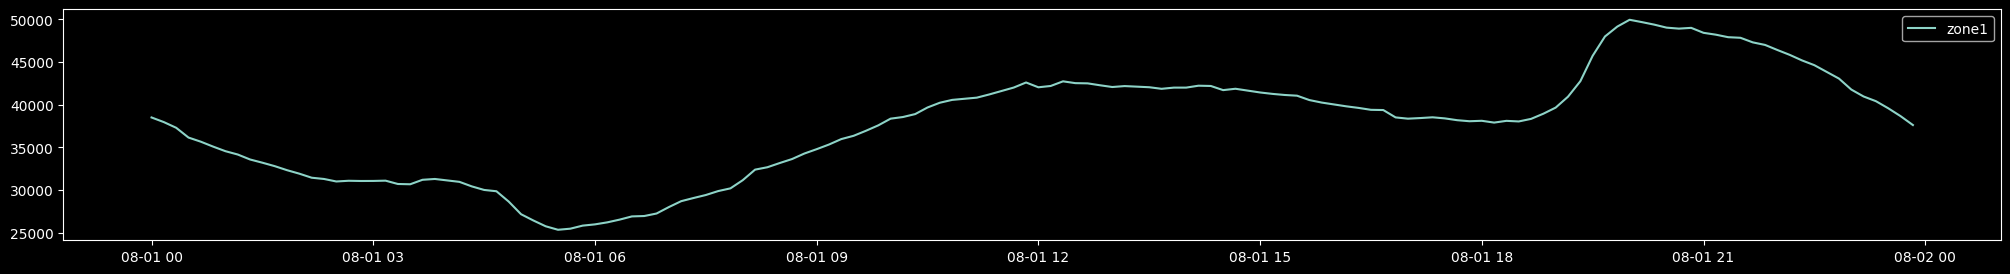

In [ ]:
plt.plot(df_8['DateTime'], df_8['zone1'], label='zone1')
plt.legend()
plt.gcf().set_size_inches(25,3)
# 저녁시간에 발젼량이 많음 